In [3]:
import pandas as pd
df = pd.read_csv('placement.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df = df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [13]:
import matplotlib.pyplot as plt


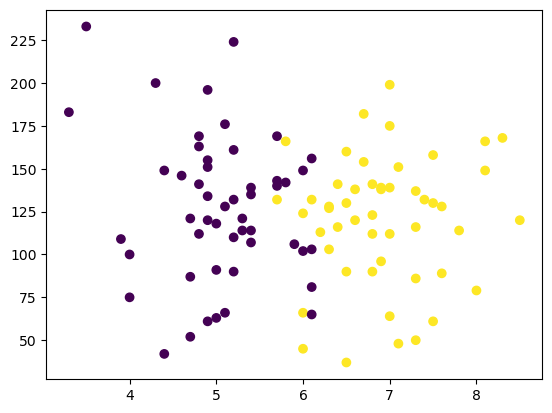

In [15]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [16]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [19]:
X.shape

(100, 2)

In [21]:
Y.shape

(100,)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [25]:
x_train

,cgpa,iq
60,6.9,139.0
56,6.1,65.0
20,6.6,120.0
14,6.1,103.0
83,7.5,130.0
...,...,...
74,6.7,154.0
0,6.8,123.0
34,4.8,163.0
59,4.8,112.0


In [27]:
y_train

60    1
56    0
20    1
14    0
83    1
     ..
74    1
0     1
34    0
59    0
54    1
Name: placement, Length: 90, dtype: int64

In [29]:
x_test

,cgpa,iq
43,6.8,141.0
33,6.0,149.0
25,5.0,91.0
98,6.3,103.0
28,5.2,90.0
22,4.9,120.0
36,5.7,140.0
5,7.1,48.0
15,5.1,176.0
82,6.5,37.0


In [31]:
y_test

43    1
33    0
25    0
98    1
28    0
22    0
36    0
5     1
15    0
82    1
Name: placement, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [37]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.76341051,  0.3539196 ],
       [ 0.08060856, -1.53630057],
       [ 0.50735978, -0.1314072 ],
       [ 0.08060856, -0.56564697],
       [ 1.27551197,  0.12402796],
       [-0.00474168, -1.51075705],
       [-0.51684314,  0.25174554],
       [ 0.84876075, -1.56184409],
       [ 0.84876075,  0.3539196 ],
       [-1.11429484, -0.10586368],
       [ 0.25130905,  0.04739741],
       [ 1.27551197, -1.63847463],
       [ 1.70226318, -1.17869135],
       [-0.77289387,  0.07294093],
       [-0.26079241,  0.17511499],
       [ 1.10481148, -0.99988674],
       [ 0.42200953, -0.89771267],
       [-0.00474168, -2.04717089],
       [ 0.84876075,  1.27348617],
       [ 0.08060856,  0.17511499],
       [-1.19964508,  0.53272421],
       [ 1.10481148,  0.30283257],
       [-1.11429484, -0.97434322],
       [-0.51684314,  0.3539196 ],
       [-2.30919824,  1.4778343 ],
       [-0.51684314, -0.28466829],
       [-0.68754362, -0.38684236],
       [ 1.36086221,  0.07294093],
       [ 0.67806026,

In [39]:
x_test = scaler.transform(x_test)


In [41]:
x_test

array([[ 0.67806026,  0.40500663],
       [-0.00474168,  0.60935476],
       [-0.85824411, -0.87216916],
       [ 0.25130905, -0.56564697],
       [-0.68754362, -0.89771267],
       [-0.94359435, -0.1314072 ],
       [-0.26079241,  0.37946312],
       [ 0.93411099, -1.97054034],
       [-0.77289387,  1.29902969],
       [ 0.42200953, -2.25151901]])

In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
clf = LogisticRegression()

In [47]:
clf.fit(x_train, y_train)

LogisticRegression()

In [49]:
y_pred = clf.predict(x_test)

In [51]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [53]:
y_test

43    1
33    0
25    0
98    1
28    0
22    0
36    0
5     1
15    0
82    1
Name: placement, dtype: int64

In [55]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test, y_pred)

0.9

In [59]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

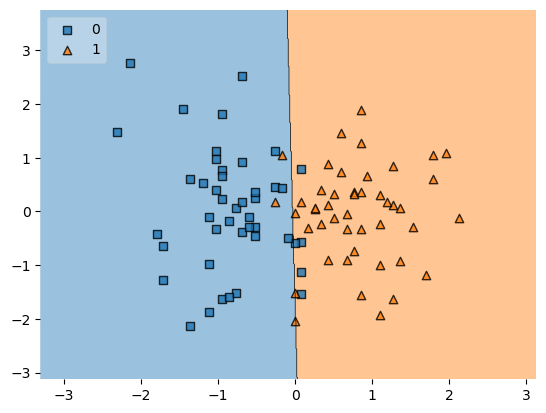

In [61]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [63]:
import pickle

In [67]:
pickle.dump(clf, open('model.pkl', 'wb'))